- Indicators such as Moving averages(MAs), Bollinger bands, Relative Strength Index(RSI) are mathematical technical analysis tools that traders and investors use to analyze the past and anticipate future price trends and patterns.

- Where fundamentalists may track economic data, annual reports, or various other measures, quantitative traders and analysts rely on the charts and indicators to help interpret price moves.

- The goal when using indicators is to identify trading opportunities. 

- For example, a moving average crossover often signals an upcoming trend change. 

- Applying the moving average crossover strategy to a price chart allows traders to identify areas where the trend changes the direction creating a potential trading opportunity.

# What are Moving Averages ?

- A moving average, also called as rolling average or running average is a used to analyze the time-series data by calculating a series of averages of the different subsets of full dataset.

- Moving averages are the averages of a series of numeric values. 

- They have a predefined length for the number of values to average and this set of values moves forward as more data is added with time. 

- Given a series of numbers and a fixed subset size, the first element of the moving averages is obtained by taking the average of the initial fixed subset of the number series. Then to obtain subsequent moving averages the subset is ‘shift forward’ i.e. exclude the first element of the previous subset and add the element immediately after the previous subset to the new subset keeping the length fixed . 

- Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.

- In the technical analysis of financial data, moving averages(MAs) are among the most widely used trend following indicators that demonstrate the direction of the market’s trend.

# Types of Moving Averages

There are many different types of moving averages depending on how the averages are computed. In any time-series data analysis, the most commonly used types of moving averages are —

1. Simple Moving Average(SMA)
2. Weighted Moving Average(WMA)
3. Exponential Moving Average (EMA or EWMA)

- The only noteworthy difference between the various moving averages is the weight assigned to data points in the moving average period. 

- Simple moving averages apply equal weight to all data points.

- Exponential and weighted averages apply more weight to recent data points.

Among these, Simple Moving Averages(SMAs) and Exponential Moving Averages(EMAs) are arguably the most popular technical analysis tool used by the analysts and traders. 

# Simple Moving Average (SMA)

- Simple Moving Average is one of the core technical indicators used by traders and investors for the technical analysis of a stock, index or securities. 

- Simple moving average is calculated by adding the the closing price of last n number of days and then diving by the number of days(time-period).

- We have studied how to compute average in school and even in our daily life we often come across the notion of it. Let’s say you are watching a game of cricket and a batsman comes for batting. By looking at his previous 5 match scores— 60, 75, 55, 80, 50; you can expect him to score roughly around 60–70 runs in today’s match.

- By calculating the average of a batsman from his last 5 matches, you were able to make a crude prediction that he’ll score this much runs today. Although, this is a rough estimation and doesn’t guarantee that he’ll score exactly same runs, but still the chances are high. Likewise, SMA helps in predicting the future trend and determine whether an asset price will continue or reverse a bull or bear trend. The SMA is usually used to identify trend direction, but it can also be used to generate potential trading signals.


**Calculating Simple moving averages — The formula for calculating the SMA is straightforward:**

**The simple moving average = (sum of the an asset price over the past n periods) / (number of periods)**

<img src = "https://miro.medium.com/max/373/1*-CBemefAuDmCY5pM4BBU7w.png">

In [1]:
# import package
import pandas_datareader.data as web
import datetime

In [2]:
# set start and end dates 
start = datetime.datetime(2018, 2, 1) 
end = datetime.datetime(2020, 2, 1) 

In [3]:
# extract the closing price data
ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
ultratech_df.head(10)

,Close Price
Date,
2018-02-01,4391.450195
2018-02-02,4179.450195
2018-02-05,4146.399902
2018-02-06,4092.649902
2018-02-07,4081.550049
2018-02-08,4167.000000
2018-02-09,4153.299805
2018-02-12,4200.299805
2018-02-14,4175.500000


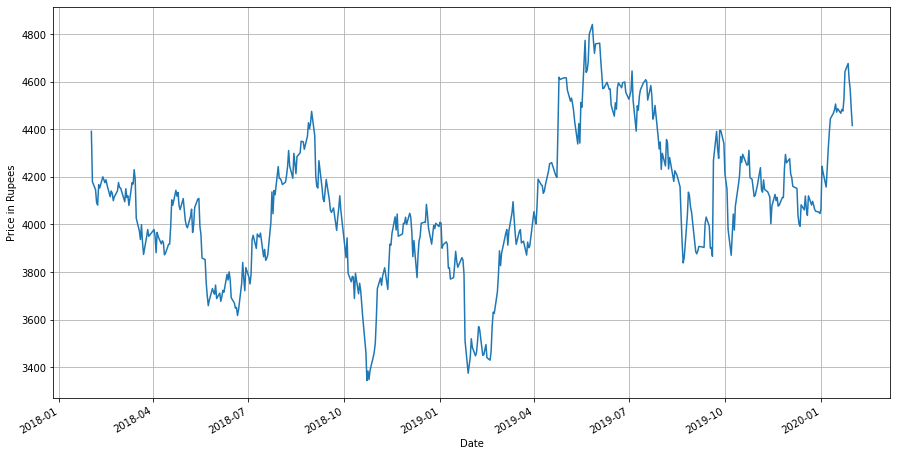

In [4]:
import matplotlib.pyplot as plt
ultratech_df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [5]:
# create 20 days simple moving average column
ultratech_df['20_SMA'] = ultratech_df['Close Price'].rolling(window = 20, min_periods = 1).mean()

In [6]:
# create 50 days simple moving average column
ultratech_df['50_SMA'] = ultratech_df['Close Price'].rolling(window = 50, min_periods = 1).mean()

In [7]:
# display first few rows
ultratech_df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2018-02-01,4391.450195,4391.450195,4391.450195
2018-02-02,4179.450195,4285.450195,4285.450195
2018-02-05,4146.399902,4239.100098,4239.100098
2018-02-06,4092.649902,4202.487549,4202.487549
2018-02-07,4081.550049,4178.300049,4178.300049


# Moving Average Crossover Strategy

- There are several ways in which stock market analysts and investors can use moving averages to analyse price trends and predict upcoming change of trends. 

- There are vast varieties of the moving average strategies that can be developed using different types of moving averages.

- In the statistics of time-series, and in particular the Stock market technical analysis, a moving-average crossover occurs when on plotting, the two moving averages each based on different time-periods tend to cross. 

- This indicator uses two (or more) moving averages — a faster moving average(short-term) and a slower(long-term) moving average. The faster moving average may be 5-, 10- or 25-day period while the slower moving average can be 50-, 100- or 200-day period. 

- A short term moving average is faster because it only considers prices over short period of time and is thus more reactive to daily price changes. 

- On the other hand, a long-term moving average is deemed slower as it encapsulates prices over a longer period and is more lethargic.

# Generating Trade signals from crossovers

A moving average, as a line by itself, is often overlaid in price charts to indicate price trends. 

A crossover occurs when a faster moving average (i.e. a shorter period moving average) crosses a slower moving average (i.e. a longer period moving average). In stock trading, this meeting point can be used as a potential indicator to buy or sell an asset.

**- When the short term moving average crosses above the long term moving average, this indicates a buy signal.**

**- Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.**

Creating a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1 else when 50-day SMA is greater than 20-day SMA then set it’s value as 0.

In [8]:
import numpy as np
ultratech_df['Signal'] = 0.0
ultratech_df['Signal'] = np.where(ultratech_df['20_SMA'] > ultratech_df['50_SMA'], 1.0, 0.0)

From these 'Signal' values, the position orders can be generated to represent trading signals. 

**Crossover happens when the faster moving average and the slower moving average cross, or in other words the 'Signal' changes from 0 to 1 (or 1 to 0).**

So, to incorporate this information, create a new column ‘Position’ which nothing but a day-to-day difference of the 'Signal' column.

In [9]:
ultratech_df['Position'] = ultratech_df['Signal'].diff()
# display first few rows
ultratech_df.head()

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2018-02-01,4391.450195,4391.450195,4391.450195,0.0,NaN
2018-02-02,4179.450195,4285.450195,4285.450195,0.0,0.0
2018-02-05,4146.399902,4239.100098,4239.100098,0.0,0.0
2018-02-06,4092.649902,4202.487549,4202.487549,0.0,0.0
2018-02-07,4081.550049,4178.300049,4178.300049,0.0,0.0


- When ‘Position’ = 1, it implies that the Signal has changed from 0 to 1 meaning a short-term(faster) moving average has crossed above the long-term(slower) moving average, thereby triggering a buy call.

- When ‘Position’ = -1, it implies that the Signal has changed from 1 to 0 meaning a short-term(faster) moving average has crossed below the long-term(slower) moving average, thereby triggering a sell call.

In [10]:
ultratech_df[ultratech_df['Position'] == 1].index

DatetimeIndex(['2018-05-11', '2018-07-16', '2018-11-28', '2019-03-12',
               '2019-10-14', '2020-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

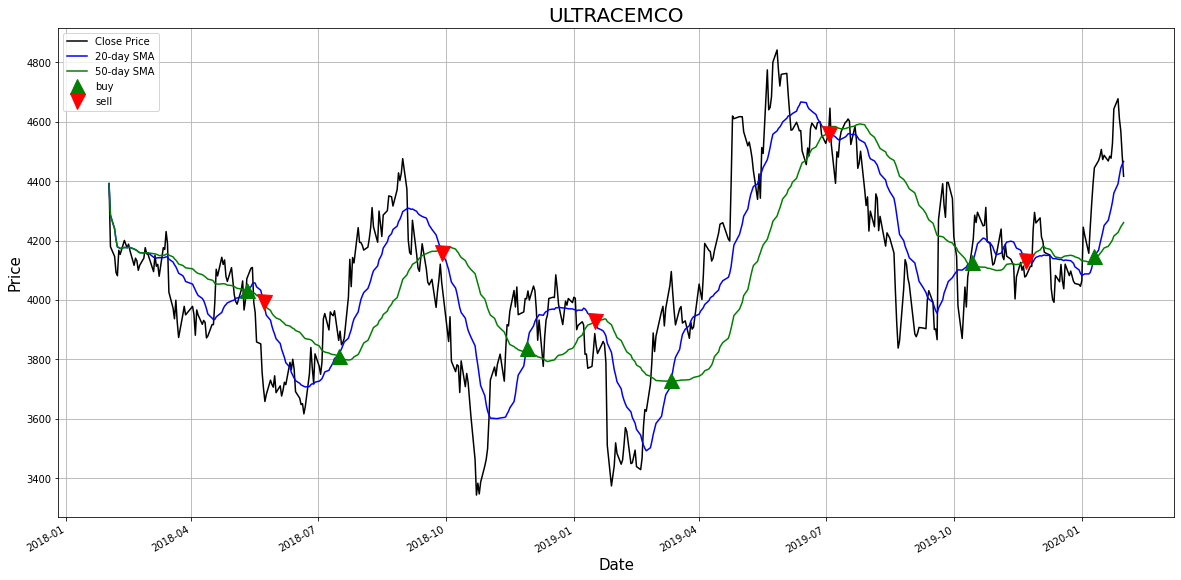

In [11]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 

ultratech_df['Close Price'].plot(color = 'k', label= 'Close Price') 
ultratech_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
ultratech_df['50_SMA'].plot(color = 'g', label = '50-day SMA')

# plot ‘buy’ signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')

# plot ‘sell’ signals
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

- The blue line represents the faster moving average(20 day SMA)
- The green line represents the slower moving average(50 day SMA)
- The black line represents the actual closing price. 

- If carefully observe, these moving averages are nothing but the smoothed versions of the actual price, but lagging by certain period of time. 

- The short-term moving average closely resembles the actual price which perfectly makes sense as it takes into consideration more recent prices. 

- In contrast, the long-term moving average has comparatively more lag and loosely resembles the actual price curve.

**A signal to buy (as represented by green up-triangle) is triggered when the fast moving average crosses above the slow moving average. This shows a shift in trend i.e. the average price over last 20 days has risen above the average price of past 50 days.**

**Likewise, a signal to sell(as represented by red down-triangle) is triggered when the fast moving average crosses below the slow moving average indicating that the average price in last 20 days has fallen below the average price of the last 50 days.**

# Exponential Moving Average (EMA or EWMA)

- It is straightforward to observe that SMA time-series are much less noisy than the original price. 

- However, this comes at a cost — SMA lag the original price, which means that changes in the trend are only seen with a delay of L days. How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly around M/2 days. 

- Thus, if we are using a 50 days SMA, this means we may be late by almost 25 days, which can significantly affect our strategy.

One way to reduce the lag induced by the use of the SMA is to use Exponential Moving Average(EMA). 

**Exponential moving averages give more weight to the most recent periods.**

This makes them more reliable than SMAs as they are comparatively better representation of the recent performance of the asset. 

**The EMA is calculated as:**

EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] )

Where:
α = 2/(N + 1)

N = the length of the window (moving average period)

EMA [today] = the current EMA value

Price [today] = the current closing price

EMA [yesterday] = the previous EMA value



In [12]:
# set start and end dates
start = datetime.datetime(2018, 2, 1)
end = datetime.datetime(2020, 2, 1)

In [13]:
# extract the daily closing price data
ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}

In [14]:
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()

In [15]:
# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()

In [16]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0)

In [17]:
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ultratech_df['Position'] = ultratech_df['Signal'].diff()

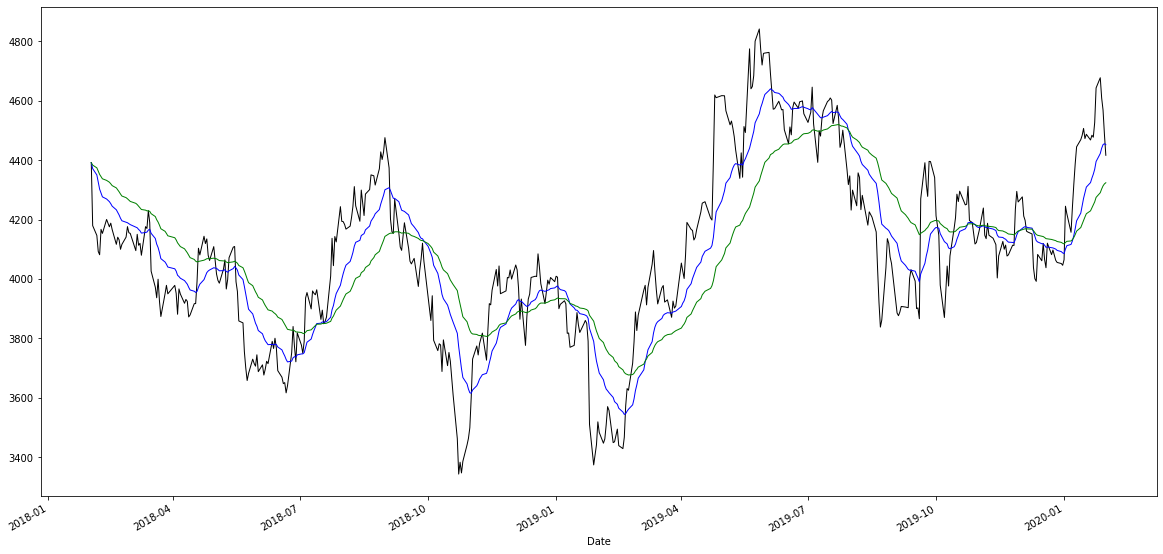

In [18]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')

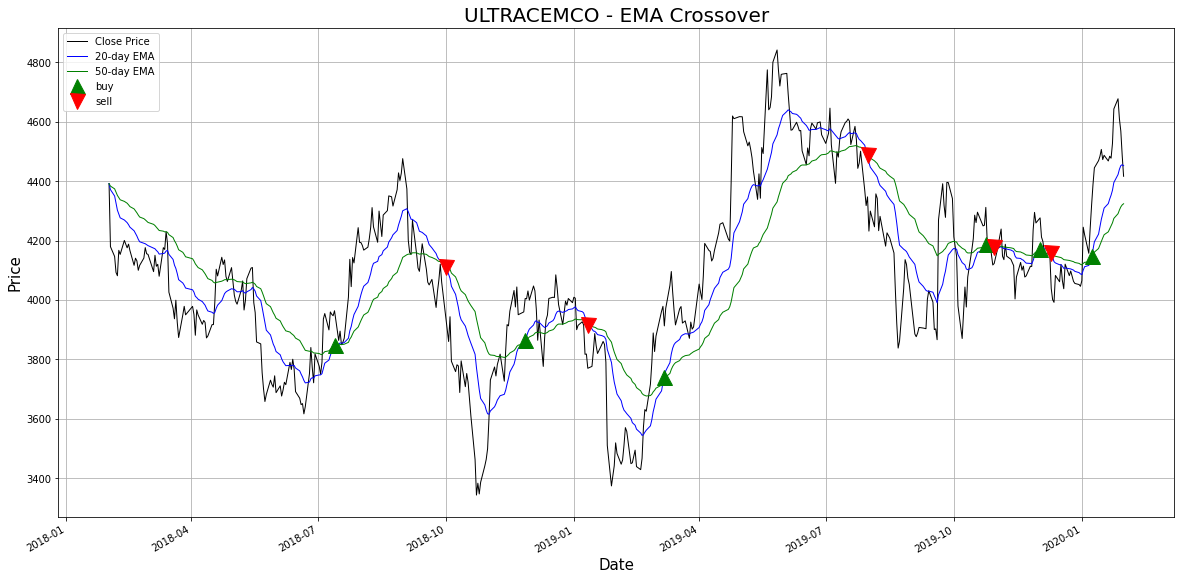

In [19]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

The following extract from John J. Murphy’s work, “Technical Analysis of the Financial Markets” published by the New York Institute of Finance, explains the advantage of the exponentially weighted moving average over the simple moving average : 

**The exponentially smoothed moving average addresses both of the problems associated with the simple moving average. First, the exponentially smoothed average assigns a greater weight to the more recent data. Therefore, it is a weighted moving average. But while it assigns lesser importance to past price data, it does include in its calculation all the data in the life of the instrument. In addition, the user is able to adjust the weighting to give greater or lesser weight to the most recent day’s price, which is added to a percentage of the previous day’s value. The sum of both percentage values adds up to 100.**

# Complete Python Program

The function ‘MovingAverageCrossStrategy()’ takes following inputs —

- stock_symbol —(str) stock ticker as on Yahoo finance.
Eg: 'ULTRACEMCO.NS'

- start_date — (str)start analysis from this date (format: 'YYYY-MM-DD')
Eg: '2018-01-01'.

- end_date— (str)end analysis on this date (format: 'YYYY-MM-DD')
Eg: '2020-01-01'.

- short_window— (int)look-back period for short-term moving average.
Eg: 5, 10, 20

- long_window — (int)look-back period for long-term moving average.
Eg: 50, 100, 200

- moving_avg— (str)the type of moving average to use ('SMA' or 'EMA').

- display_table — (bool)whether to display the date and price table at buy/sell positions(True/False).


In [20]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

def MovingAverageCrossStrategy(stock_symbol = 'ULTRACEMCO.NS', start_date = '2018-01-01', end_date = '2020-01-01', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA', display_table = True):
    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol, 'yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 
                        
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        stock_df[short_window_col] = stock_df['Close Price'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        stock_df[long_window_col] = stock_df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    stock_df['Signal'] = 0.0  
    stock_df['Signal'] = np.where(stock_df[short_window_col] > stock_df[long_window_col], 1.0, 0.0) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    stock_df['Position'] = stock_df['Signal'].diff()

    # plot close price, short-term and long-term moving averages
    plt.figure(figsize = (20,10))
    plt.tick_params(axis = 'both', labelsize = 14)
    stock_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
    stock_df[short_window_col].plot(color = 'b', lw = 1, label = short_window_col)
    stock_df[long_window_col].plot(color = 'g', lw = 1, label = long_window_col) 

    # plot 'buy' signals
    plt.plot(stock_df[stock_df['Position'] == 1].index, 
            stock_df[short_window_col][stock_df['Position'] == 1], 
            '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

    # plot 'sell' signals
    plt.plot(stock_df[stock_df['Position'] == -1].index, 
            stock_df[short_window_col][stock_df['Position'] == -1], 
            'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
    plt.ylabel('Price in ₹', fontsize = 16 )
    plt.xlabel('Date', fontsize = 16 )
    plt.title(str(stock_symbol) + ' - ' + str(moving_avg) + ' Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    
    if display_table == True:
        df_pos = stock_df[(stock_df['Position'] == 1) | (stock_df['Position'] == -1)]
        df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
        print(tabulate(df_pos, headers = 'keys', tablefmt = 'psql'))

**Now, let’s test our script on last 4 years of HDFC bank stock. We’ll be using 50-day and 200-day SMA crossover strategy.**

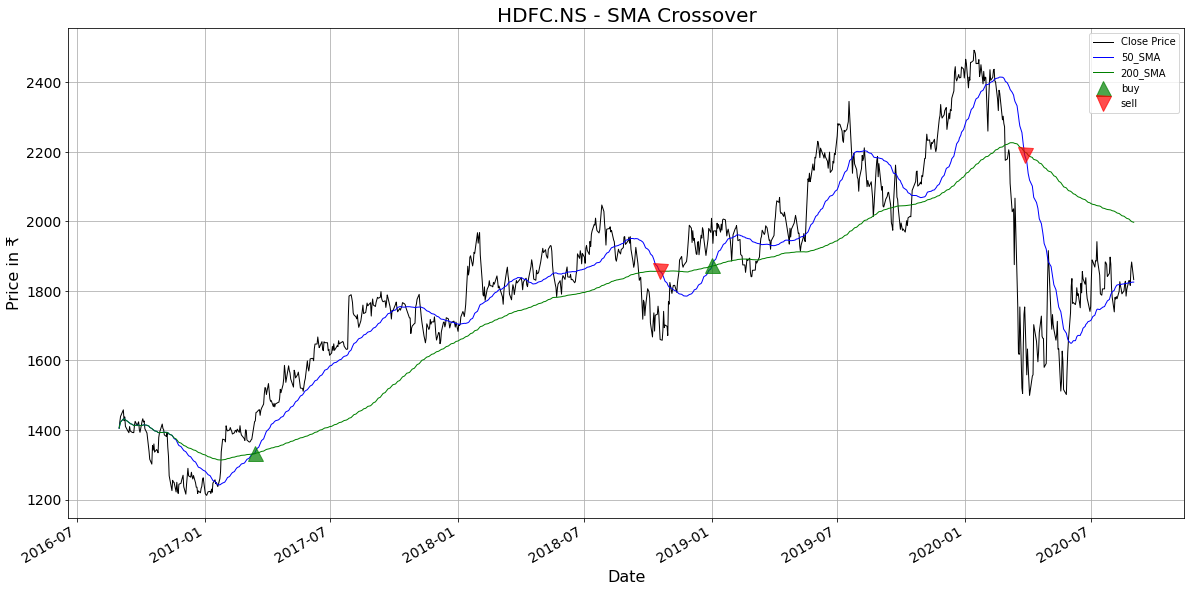

+---------------------+---------------+----------+-----------+----------+------------+
| Date                |   Close Price |   50_SMA |   200_SMA |   Signal | Position   |
|---------------------+---------------+----------+-----------+----------+------------|
| 2017-03-14 00:00:00 |       1424.15 |  1333.33 |   1331.63 |        1 | Buy        |
| 2018-10-19 00:00:00 |       1660.25 |  1856.42 |   1856.86 |        0 | Sell       |
| 2019-01-02 00:00:00 |       1980.65 |  1874.96 |   1871.82 |        1 | Buy        |
| 2020-03-27 00:00:00 |       1754    |  2190.46 |   2199.7  |        0 | Sell       |
+---------------------+---------------+----------+-----------+----------+------------+


In [21]:
MovingAverageCrossStrategy('HDFC.NS', '2016-08-31', '2020-08-31', 50, 200, 'SMA', display_table = True)

**How about Fortis Healtcare stock? This time we analyze past 1 year of data and consider 20-days and 50-days EMA Crossover. Also, this time we won’t be displaying the table.**

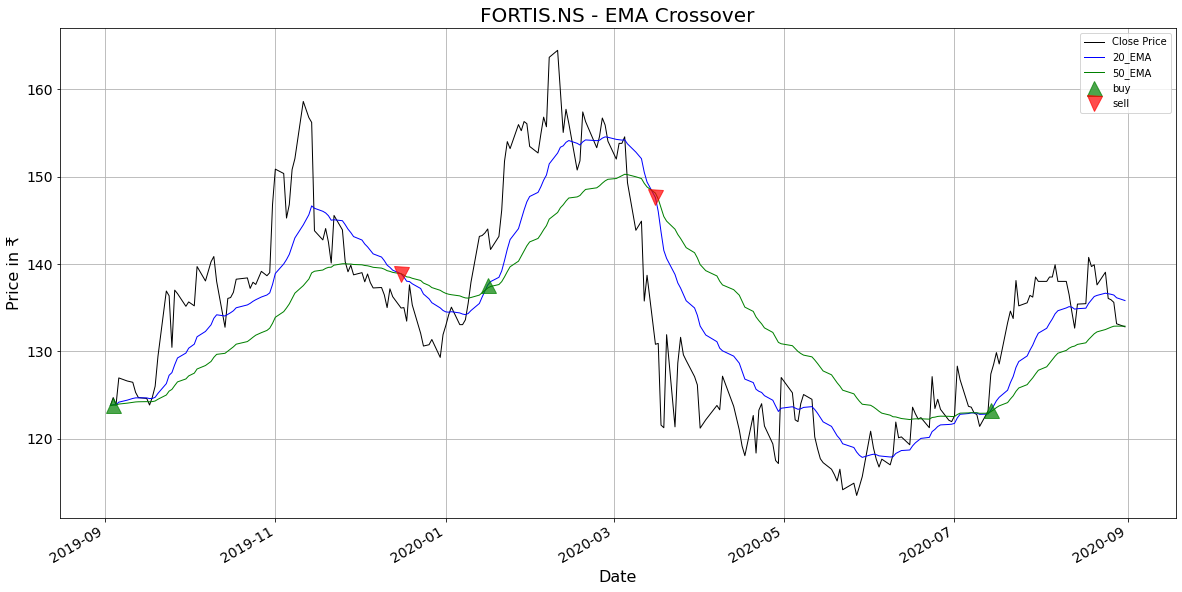

In [22]:
MovingAverageCrossStrategy('FORTIS.NS', '2019-08-31', '2020-08-31', 20, 50, 'EMA', display_table = False)

- Due to the fundamental difference in the way they are calculated, EMA reacts quickly to the price changes while SMA is comparatively slow to react. 

- But, one is not necessarily better than another. 

- Each trader must decide which MA is better for his or her particular strategy. 

- In general, shorter-term traders tend to use EMAs because they want to be alerted as soon as the price is moving the other way. 

- On the other hand, longer-term traders tend to rely on SMAs since these investors aren’t rushing to act and prefer to be less actively engaged in their trades.


### **Source:**
    
https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a